## Python Implementation

### Business Case:-To find out based on given features whether the loan will get approved or not

In [1]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## loading the data
data=pd.read_csv('loan_approved.csv')

In [3]:
## Getting the first few rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

## Basic Checks

In [5]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Exploratory Data Analysis

In [7]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
## Bivariate Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data1=data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]
data2=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

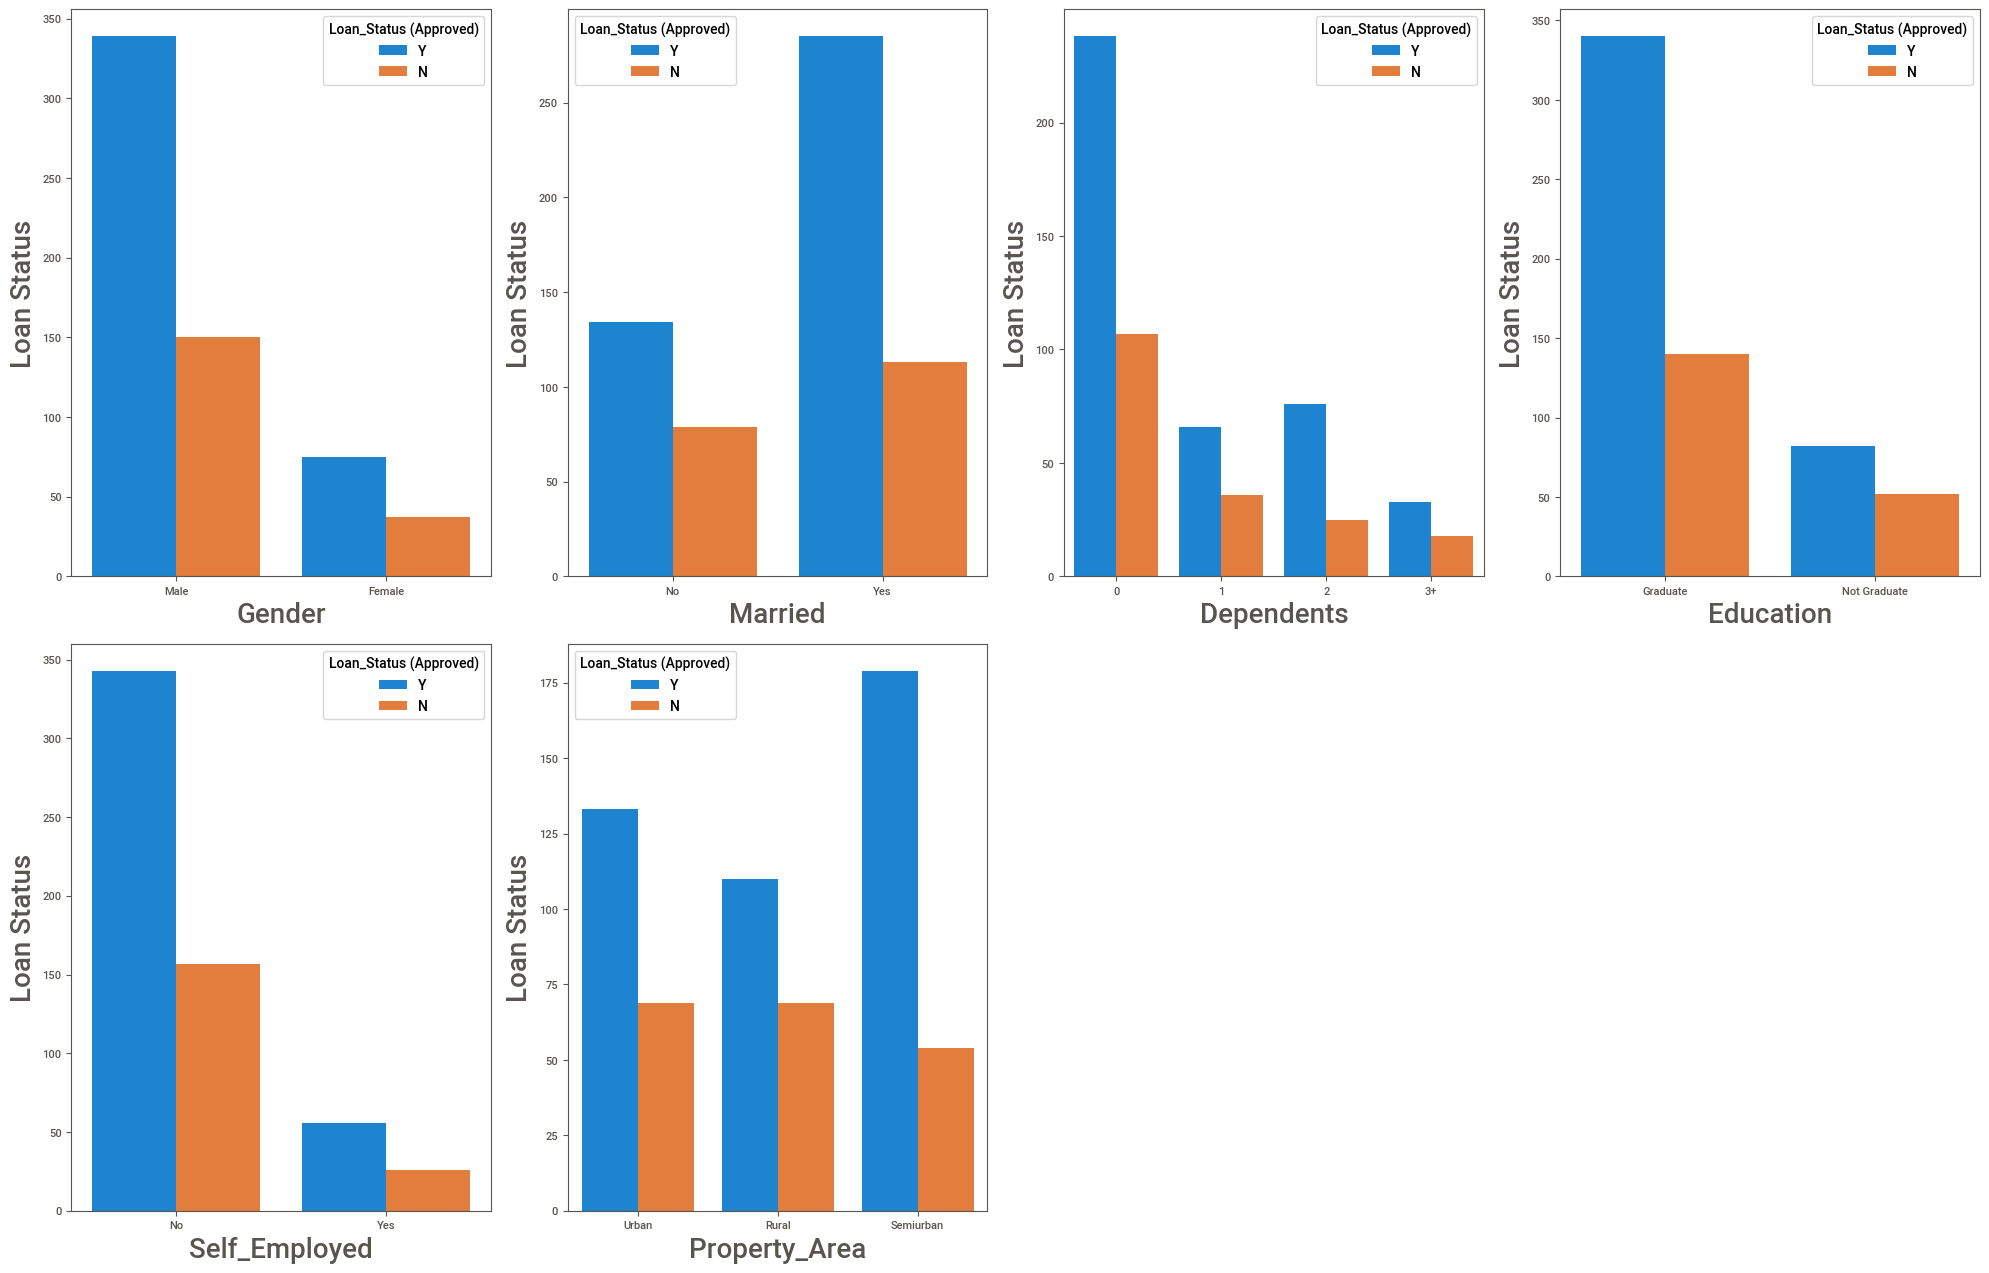

In [10]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data1[column],hue=data['Loan_Status (Approved)'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

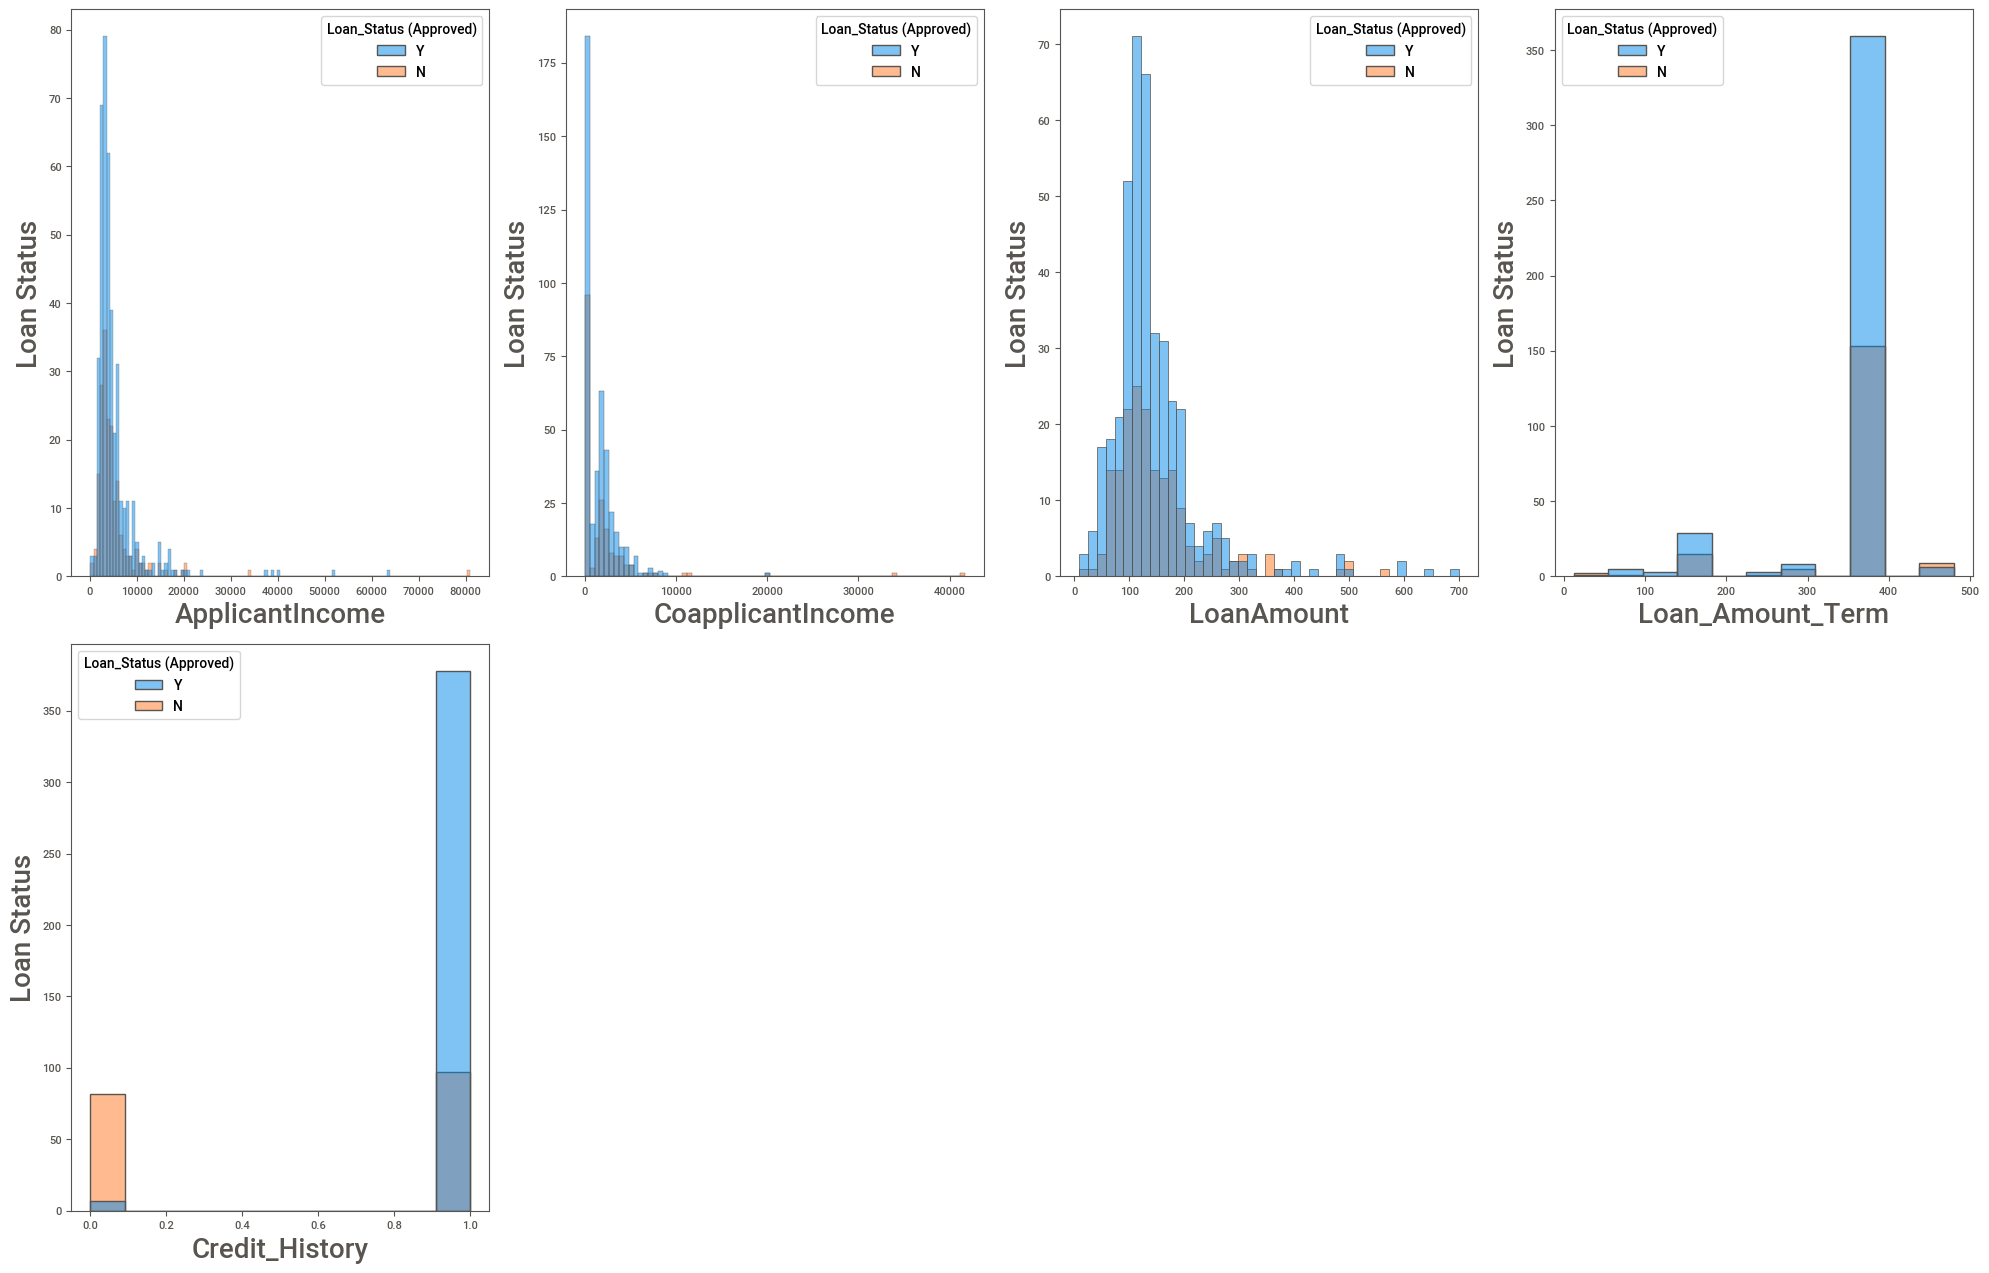

In [11]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data2:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data2[column],hue=data['Loan_Status (Approved)'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

## Data Preprocessing Pipeline

In [12]:
## Checking missing values

data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [13]:
data.shape

(614, 13)

In [14]:
## Getting the rows where values are missed in Gender features
data.loc[data['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [15]:
## Checking the distribution along the both labels
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [16]:
## How much values have been missed
data.Gender.isnull().sum()/len(data)*100

2.1172638436482085

In [17]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='Gender', ylabel='count'>

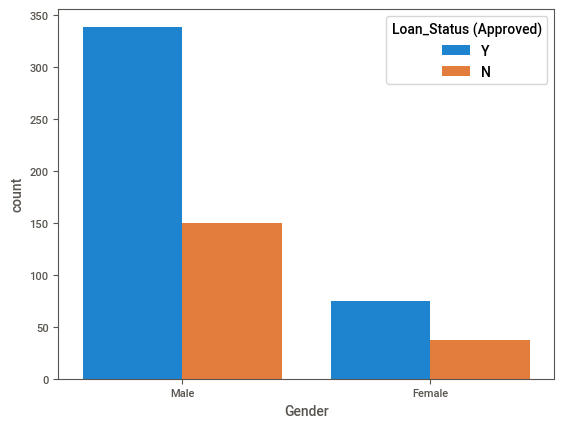

In [18]:
import seaborn as sns

sns.countplot(x='Gender',hue='Loan_Status (Approved)',data=data)

In [19]:
## Imputing the missing values with mode
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [20]:
data.Gender.isnull().sum()

0

In [21]:
## Getting the values in Dependents
data.loc[data['Dependents'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [22]:
data.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [23]:
data.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

<Axes: xlabel='Dependents', ylabel='count'>

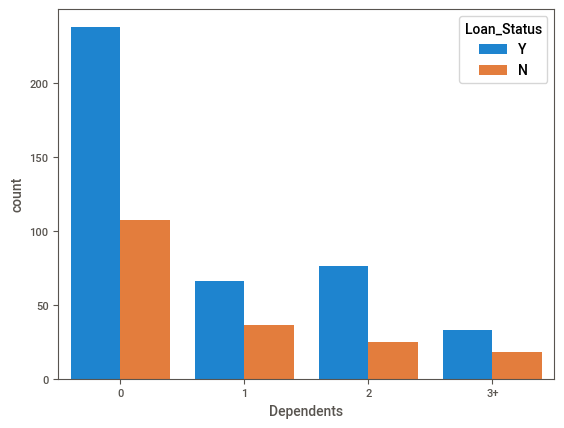

In [24]:
sns.countplot(x='Dependents',data=data,hue='Loan_Status')

In [25]:
pd.crosstab(data.Dependents,data.Loan_Status)

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [26]:
# From the graphical representation it can be seen that as the number of dependents 
#getting increased,
# the chances of approval is less, since we have missed values and if we approve
# loan for them
# it can turn into major loss(high chance).Hence we will substitue missing values
#by 3+.
data.loc[data['Dependents'].isnull()==True,'Dependents']='3+'

In [27]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
## For married feature
data.loc[data['Married'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,3+,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,3+,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,3+,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


<Axes: xlabel='Married', ylabel='count'>

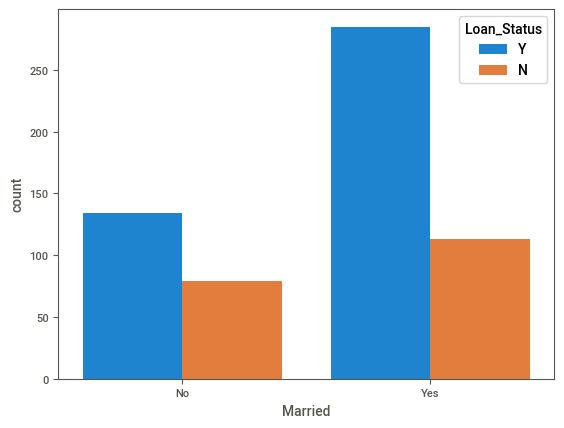

In [29]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

In [30]:
## getting the counts
data.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [31]:
## Imputing with yes i.e mode
data.loc[data['Married'].isnull()==True,'Married']='Yes'

In [32]:
## Checking Self_Employed
#data.loc[data['Self_Employed'].isnull()==True]
data.loc[data['Self_Employed']=='No']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


<Axes: xlabel='Self_Employed', ylabel='count'>

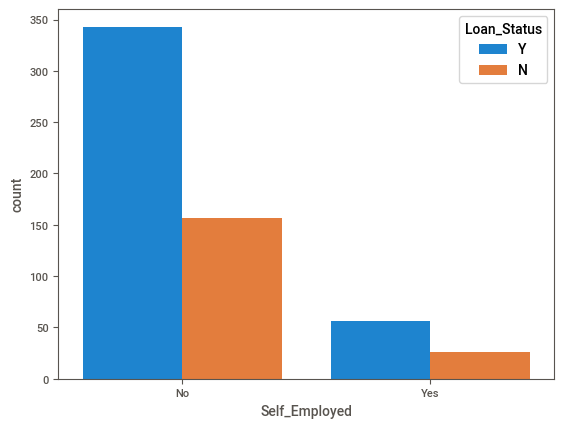

In [33]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

In [34]:
pd.crosstab(data.Self_Employed,data.Loan_Status)

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [35]:
data.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

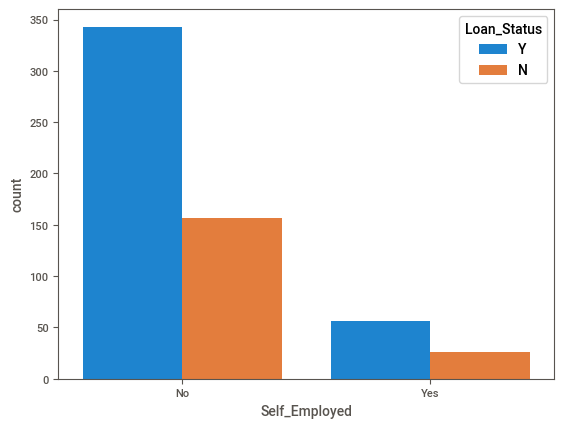

In [36]:
sns.countplot(x='Self_Employed',data=data,hue='Loan_Status')

In [37]:
# Replace the nan values with mode
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [38]:
# check for null values
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

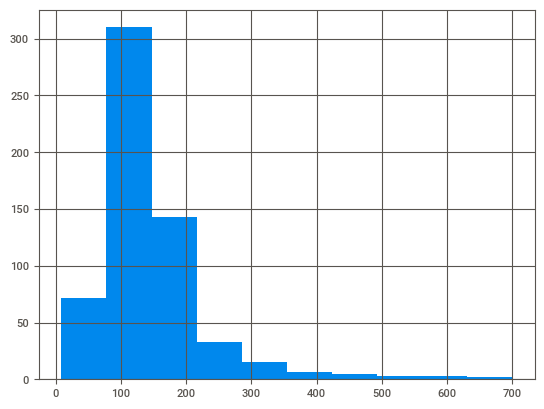

In [39]:
## Histogram since it has numerical value
data.LoanAmount.hist()
plt.show()

Since data is skewed, we can use median to replace the nan value. It is recommended to use mean only for symmetric data distribution.

In [40]:
# Check median for LoanAmount column
np.median(data.LoanAmount.dropna(axis=0))

128.0

In [41]:
# Replace the nan values in LoanAmount column with median value
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=np.median(data.LoanAmount.dropna(axis=0))

In [42]:
data.LoanAmount.isnull().sum()

0

In [43]:
data.Loan_Amount_Term.isnull().sum()

14

In [44]:
data.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [45]:
data.Loan_Amount_Term.median()

360.0

<Axes: >

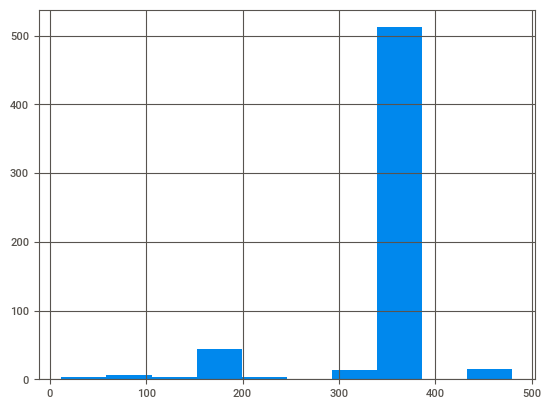

In [46]:
data.Loan_Amount_Term.hist()

In [47]:
# replace the nan values in Loan_Amount_Term with the median value
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(data.Loan_Amount_Term.dropna(axis=0))

In [48]:
# Credit_History
data.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

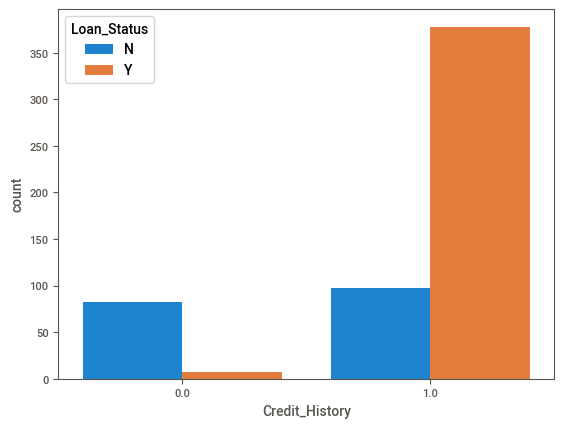

In [49]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status')

In [50]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=0.0

In [51]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
## Step 2 Handling the categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
data.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [54]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [55]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
# One hot encoding
df1=pd.get_dummies(data['Gender'],prefix='Gender',drop_first=True).astype(int)
data=pd.concat([data,df1],axis=1).drop(['Gender'],axis=1)

In [57]:
data.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [58]:
df1=pd.get_dummies(data['Married'],prefix='Married',drop_first=True).astype(int)
data=pd.concat([data,df1],axis=1).drop(['Married'],axis=1)

In [59]:
df1=pd.get_dummies(data['Education'],prefix='Education',drop_first=True).astype(int)
data=pd.concat([data,df1],axis=1).drop(['Education'],axis=1)

In [60]:
df1=pd.get_dummies(data['Property_Area'],prefix='Property_Area',drop_first=True).astype(int)
data=pd.concat([data,df1],axis=1).drop(['Property_Area'],axis=1)

In [61]:
df1=pd.get_dummies(data['Dependents'],prefix='Dependents',drop_first=True).astype(int)
data=pd.concat([data,df1],axis=1).drop(['Dependents'],axis=1)

In [62]:
df1=pd.get_dummies(data['Self_Employed'],prefix='Self_Employed',drop_first=True).astype(int)
data=pd.concat([data,df1],axis=1).drop(['Self_Employed'],axis=1)

In [63]:
data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,LP001002,5849,0.0,128.0,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,1,0,0,0,0


In [104]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome',
                          'LoanAmount']])

#because we need to do normalization as the vaalues are in range

In [65]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,342.410423,0.773616,0.817590,0.653094,0.218241,0.379479,0.328990,0.166124,0.164495,0.107492,0.133550
std,0.075560,0.070229,0.121718,64.428629,0.418832,0.386497,0.476373,0.413389,0.485653,0.470229,0.372495,0.371027,0.309990,0.340446
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.045300,0.028524,0.172214,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.069821,0.055134,0.225398,360.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,LP002979,0.048930,0.000000,0.044863,180.0,1.0,Y,1,1,0,0,0,0,0,1,0
611,LP002983,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,0,1,1,0,0,0
612,LP002984,0.091936,0.000000,0.257598,360.0,1.0,Y,1,1,0,0,1,0,1,0,0


In [67]:
## checking the duplicate rows

#data.duplicate()
data.duplicated().sum()

0

In [68]:
## Saving the preprocessed data.
data.to_csv('Preprocessed_data.csv')

In [69]:
## Loading the data
preprcessed_data=pd.read_csv('Preprocessed_data.csv')

In [70]:
preprcessed_data

,Unnamed: 0,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,LP002978,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,610,LP002979,0.048930,0.000000,0.044863,180.0,1.0,Y,1,1,0,0,0,0,0,1,0
611,611,LP002983,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,0,1,1,0,0,0
612,612,LP002984,0.091936,0.000000,0.257598,360.0,1.0,Y,1,1,0,0,1,0,1,0,0


## Feature Selection

In [71]:
# Removing redundant columns
#We can drop loan id.  
l1=['Unnamed: 0','Loan_ID']
preprcessed_data.drop(l1,axis=1,inplace=True)

In [72]:
preprcessed_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,0.048930,0.000000,0.044863,180.0,1.0,Y,1,1,0,0,0,0,0,1,0
611,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,0,1,1,0,0,0
612,0.091936,0.000000,0.257598,360.0,1.0,Y,1,1,0,0,1,0,1,0,0


In [73]:
## checking correlation
corr_data=preprcessed_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

<Axes: >

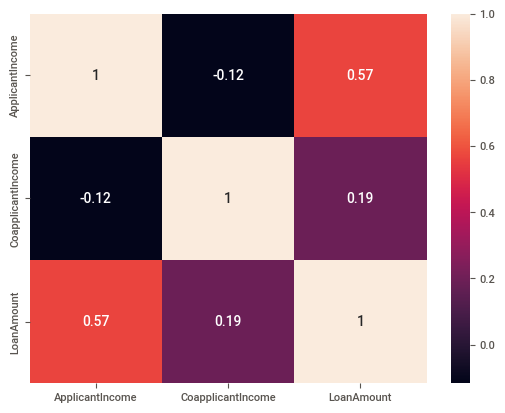

In [74]:
sns.heatmap(corr_data.corr(),annot=True)

In [75]:
corr_data.describe() ## no constant features

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905
std,0.075560,0.070229,0.121718
min,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055
50%,0.045300,0.028524,0.172214
75%,0.069821,0.055134,0.225398
max,1.000000,1.000000,1.000000


In [76]:
preprcessed_data.Loan_Status=data.Loan_Status.map({'Y':1,'N':0})

## Model Creation

In [77]:
preprcessed_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.000000,0.172214,360.0,1.0,1,1,0,0,0,1,0,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,0,1,1,0,0,0,1,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,1,1,1,0,0,1,0,0,0,1
3,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,1,0,1,0,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,1,1,0,0,0,1,0,0,0,0


In [78]:
preprcessed_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Self_Employed_Yes'],
      dtype='object')

In [80]:
## defining X and y

X=preprcessed_data.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Self_Employed_Yes']]
y=preprcessed_data.Loan_Status

In [81]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.000000,0.172214,360.0,1.0,1,0,0,0,1,0,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,1,1,0,0,0,1,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,1,1,0,0,1,0,0,0,1
3,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,0,1,0,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,360.0,1.0,0,0,0,0,0,0,0,0,0
610,0.048930,0.000000,0.044863,180.0,1.0,1,1,0,0,0,0,0,1,0
611,0.097984,0.005760,0.353111,360.0,1.0,1,1,0,0,1,1,0,0,0
612,0.091936,0.000000,0.257598,360.0,1.0,1,1,0,0,1,0,1,0,0


In [82]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [83]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [84]:
## balancing the data
data.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [85]:
# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

**Counter** is a container which keeps track to how many times equivalent values are added. Python counter class is a part of collections module and is a subclass of dictionary.

In [86]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [87]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 301, 0: 159})
SMOTE Classes Counter({1: 301, 0: 301})


In [88]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [89]:
# Predict output for X_test

y_hat=svclassifier.predict(X_test)

In [90]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7857142857142857

In [91]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        33
           1       0.79      0.98      0.88       121

    accuracy                           0.79       154
   macro avg       0.65      0.52      0.49       154
weighted avg       0.73      0.79      0.71       154



In [92]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,0,1
Loan_Status,,
0,2,31
1,2,119


In [93]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.8782287822878228

In [94]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.8150289  0.8150289  0.81395349]
Cross validation Score: 0.8146704306134337
Std : 0.0005069547205710685


## What is a Model Hyperparameter?

A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.



## Hyperparameters of Support Vector Machine

#### SVM separates data points that belong to different classes with a decision boundary. When determining the decision boundary, a soft margin SVM (soft margin means allowing some data points to be misclassified) tries to solve an optimization problem with the following goals:

#### 1)Increase the distance of decision boundary to classes (or support vectors)
#### 2)Maximize the number of points that are correctly classified in the training set

### There is obviously a trade-off between these two goals which and it is controlled by C which adds a penalty for each misclassified data point.

### If C is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassification.

### If C is large, SVM tries to minimize the number of misclassified examples due to the high penalty which results in a decision boundary with a smaller margin. The penalty is not the same for all misclassified examples. It is directly proportional to the distance to the decision boundary.

<img src='1_XFtyzSNjexMecQ4wmqBfgA.PNG'  width="300">

<img src='1_k4wh7vzjDbQWXx7wKyH0kg.PNG'  width="600">



### Gamma is a hyperparameter used with non-linear SVM. One of the most commonly used non-linear kernels is the radial basis function (RBF). Gamma parameter of RBF controls the distance of the influence of a single training point.

### Low values of gamma indicate a large similarity radius which results in more points being grouped together. 

### For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit.

<img src='1_JDSwT-svWnAu69fy9oguBw.png' width="600">


<img src='1_faj7x1I0uFwfU6mkLfUwvg.png' width="600">

<img src='1_5DtPKUzLI1e-FIjC-odFiw.png' width="600">

## GridSearchCV

#### It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters

#### Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

#### GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In [95]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))} 
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV 1/5] END ....C=0.1, gamma=1, random_state=1;, score=0.817 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state=1;, score=0.817 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, random_state=1;, score=0.812 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, random_state=1;, score=0.812 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, random_state=1;, score=0.816 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, random_state=2;, score=0.817 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state=2;, score=0.817 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, random_state=2;, score=0.812 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, random_state=2;, score=0.812 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, random_state=2;, score=0.816 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, random_state=3;, score=0.817 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, random_state

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=3)

In [96]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

{'C': 5, 'gamma': 0.1, 'random_state': 1}


In [97]:
#clf=SVC(C=100, gamma=0.001,random_state=42) ##0.1
clf=SVC(C=10, gamma=0.01,random_state=1) ##0.1

In [98]:
clf.fit(X_smote, y_smote)

SVC(C=10, gamma=0.01, random_state=1)

In [99]:
y_clf=clf.predict(X_test)

In [100]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.50      0.45      0.48        33
           1       0.85      0.88      0.87       121

    accuracy                           0.79       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.78      0.79      0.78       154



In [101]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,0,1
Loan_Status,,
0,15,18
1,15,106


In [102]:
f1=f1_score(y_test,y_clf)
f1

0.8653061224489798

In [103]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.84868421 0.82736156 0.84827586]
Cross validation Score: 0.8414405453710656
Std : 0.0005069547205710685


# If you can see f1 score is improved however the recall is still lagging.

# Task:-Change the all preprocessing technqiue and try to see if performance can be improved for not.

# We still have ot gone through feature selection technqiue.
